# PREDICTING HEART DISEASE USING ML

THIS NOTEBOOK USES VARIOUS PYTHON-BASED ML AND DATA SCIENCE LIBRARIES IN AN ATTEMPT TO BUILD A ML MODEL CAPABLE OF PREDICTING WHETHER OR NOT SOMEONE HAS HEART DISEASE BASED ON THEIR MEDICAL ATTRIBUTES

-------------------------------------------------------------------------------------------------------------------------------

We are going to take following approach -
1. problem definition
2. data
3. evaluation
4. features
5. modelling
6. experimentation
-------------------------------------------------------------------------------------------------------------------------------

# 1. Problem Statement
> Given clinical parameters about a patient , can we predict whether or not they have heart disease

# 2. Data
The original data came from Cleavland data from UCI machine learning repo
https://archive.ics.uci.edu/ml/datasets/heart+Disease

there is also a version of it available on Kaggle
https://www.kaggle.com/ronitf/heart-disease-uci

# 3. Evaluation
if we can reach 95% accuracy at predicting whether or not a patient has heart disease during proof of concept , we will pursue the project

# 4. Features
**create data dictionary**
* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* num: diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing


# 0. Preparing the tools
we are going to use pandas,numpy,matplotlib for data analysis and manipulation

## import all the tools

In [1]:
# regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#we want our plots to appear inside the notebook
%matplotlib inline 

# models from sk-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model-evaluation
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,plot_roc_curve

# 1. Load data

In [2]:
df=pd.read_csv("datasets/heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

# 2. Data exploration or EDA
1. what ques you are trying to solve 
2. what kind of data do we have and how to treat different types
3. what is missing and how to deal with it
4. what are outliers and why should you care about them
5. how can you add,change or remove features to get more out of data

In [4]:
## how many of each class there
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

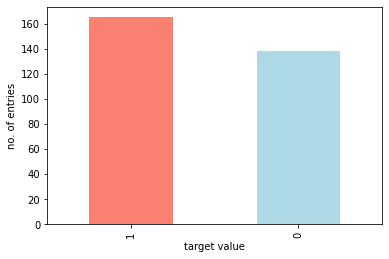

In [5]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"],xlabel="target value",ylabel="no. of entries");

In [6]:
# are there any missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## comparing columns

#### * heart disease frequency to sex

In [7]:
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


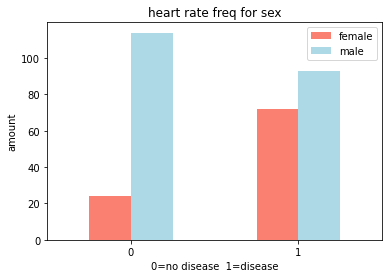

In [8]:
pd.crosstab(df["target"],df["sex"]).plot(kind="bar",color=["salmon","lightblue"])
plt.title("heart rate freq for sex")
plt.xlabel("0=no disease  1=disease")
plt.ylabel("amount")
plt.legend(["female","male"])
plt.xticks(rotation=0);

#### * age,thalach and target

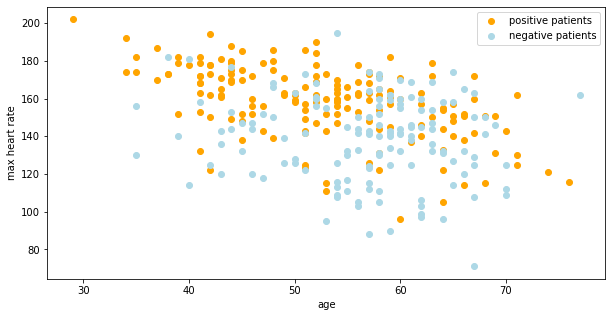

In [9]:
plt.figure(figsize=(10,5))
plt.scatter(df.age[df.target==1],df.thalach[df.target==1],c="orange");
plt.scatter(df.age[df.target==0],df.thalach[df.target==0],c="lightblue");
plt.xlabel("age")
plt.ylabel("max heart rate")
plt.legend(["positive patients","negative patients"]);

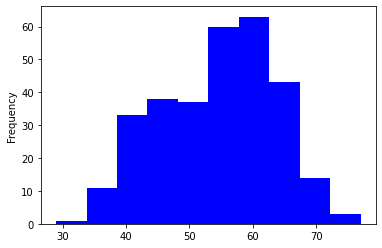

In [10]:
df.age.plot.hist(color="blue");

#### * cp and target

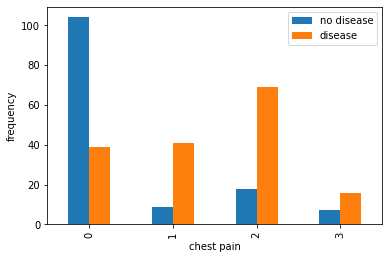

In [11]:
pd.crosstab(df.cp,df.target).plot(kind="bar");
plt.xlabel("chest pain")
plt.ylabel("frequency")
plt.legend(["no disease","disease"]);

## make a corelation matrix

In [12]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


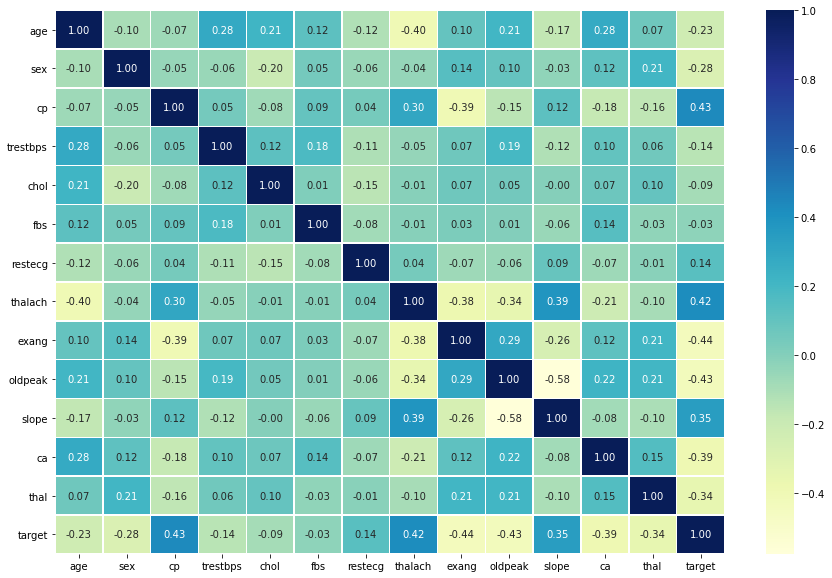

In [13]:
cor_mat=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGnBu")

# 5. Modelling

## split data

In [14]:
x=df.drop("target",axis=1)
y=df["target"]
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [15]:
x_train.shape,x_test.shape,x.shape

((242, 13), (61, 13), (303, 13))

In [16]:
y_train.shape,y_test.shape,y.shape

((242,), (61,), (303,))

## selecting right model
we are goig to try 3 models -
1. logistic regression
2. k-nearest neighbours classifier
3. random forest classifier

In [17]:
# put models in a dictionary
models={"Logistic Regression":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
        "Random Forest":RandomForestClassifier()
       }

In [18]:
# create a functio to fit and score models
def fit_score(models,x_train,x_test,y_train,y_test):
    """
    fits and evaluates given ml models
    models:dict of diff sklearn models
    x_train:training data(no labels)
    x_test:testing data (no labels)
    y_train:training labels
    y_test:testing labels
    """
    np.random.seed(42)
    
    model_scores={}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name]=model.score(x_test,y_test)
    return model_scores

In [19]:
model_scores=fit_score(models,x_train,x_test,y_train,y_test)
model_scores

C:\Users\sunshine\Desktop\ml_and_data_sciene\sample\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## model comparison

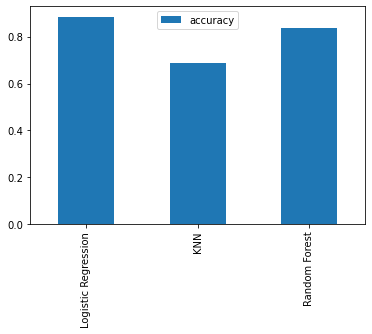

In [20]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot(kind="bar");

lets look at following :
* hyperparameter tuning
* feature importance
* confusion matrix
* cross validation
* precision
* recall
* f1 score
* classification report
* ROC curve
* area under curve (AUC) 

## hyperparameter tuning (by hand)

#### let's tune KNN 

In [21]:
train_scores=[]
test_scores=[]

# create a list of different values for n_neighbours
neighbours=range(1,21)

# setup KNN instance
knn=KNeighborsClassifier()

for i in neighbours:
    knn.set_params(n_neighbors=i)
    knn.fit(x_train,y_train)
    train_scores.append(knn.score(x_train,y_train))
    test_scores.append(knn.score(x_test,y_test))
    

In [22]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [23]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

max KNN score on test data : 0.7540983606557377%


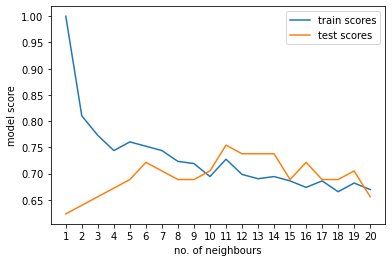

In [24]:
plt.plot(neighbours,train_scores,label="train scores")
plt.plot(neighbours,test_scores,label="test scores")
plt.xlabel("no. of neighbours")
plt.xticks(np.arange(1,21,1))
plt.ylabel("model score")
plt.legend()

print(f"max KNN score on test data : {max(test_scores*100)}%")

## hyperparameter tuning with RandomizedSearchCV

#### let's tune LogisticRegression() , RandomForestClassifier()

In [25]:
# hyperparameter grid for LogisticRegression()
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]
             }


# hyperparameter grid for RandomForestClassifier()
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)
        }

#### tune LogisticRegression()

In [26]:
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,n_iter=20,verbose=True)
rs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [27]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [28]:
rs_log_reg.score(x_test,y_test)

0.8852459016393442

#### tune RandomForestClassifier()

In [29]:
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,n_iter=20,verbose=True)
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [30]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [31]:
rs_rf.score(x_test,y_test)

0.8688524590163934

In [32]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## hyperparameter tuning using GridSearchCV

since our LogisticRegression model provides best scores so far , we will try to improve it

In [33]:
log_reg_grid={"C":np.logspace(-4,4,30),
              "solver":["liblinear"]
             }
gs_log_reg=GridSearchCV(LogisticRegression(),param_grid=log_reg_grid,verbose=True)
gs_log_reg.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [34]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [35]:
gs_log_reg.score(x_test,y_test)

0.8852459016393442

In [36]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## evaluating our ml classifier beyond accuracy

In [37]:
# make predictions with our tuned  model
y_preds=gs_log_reg.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [38]:
pd.array(y_test)

<PandasArray>
[0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
 1, 1, 0, 0, 0, 1, 0, 0, 0]
Length: 61, dtype: int64

#### ROC Curve and AUC

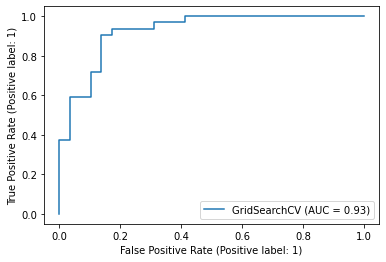

In [39]:
# plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg,x_test,y_test);

#### confusion matrix

In [40]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


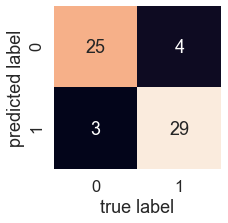

In [41]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_pred):
    """
    plots a nice looking confusion matrix using seaborn heatmap()
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test,y_preds)

#### classification report (precision,recall,f1)

In [42]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



#### evaluation metrics using cross validation

In [43]:
# check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [44]:
# create new classifier with best parameters
clf=LogisticRegression(C=0.20433597178569418,solver='liblinear')
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [45]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8446994535519124

In [46]:
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision

array([0.775     , 0.88571429, 0.85714286, 0.86111111, 0.725     ])

In [47]:
cv_precision=np.mean(cv_precision)
cv_precision

0.8207936507936507

In [48]:
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall

array([0.93939394, 0.93939394, 0.90909091, 0.93939394, 0.87878788])

In [49]:
cv_recall=np.mean(cv_recall)
cv_recall

0.9212121212121213

In [50]:
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1

array([0.84931507, 0.91176471, 0.88235294, 0.89855072, 0.79452055])

In [51]:
cv_f1=np.mean(cv_f1)
cv_f1

0.8673007976269721

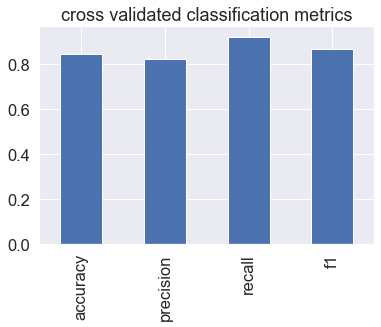

In [53]:
cv_metrics=pd.DataFrame({"accuracy":cv_acc,
                        "precision":cv_precision,
                        "recall":cv_recall,
                        "f1":cv_f1
                       },index=[0])
cv_metrics.T.plot.bar(title="cross validated classification metrics",legend=False);

## feature importance
which features contributed most to the outcomes of model and how did they contribute

In [54]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [55]:
clf=LogisticRegression(C=0.20433597178569418,solver='liblinear')
clf.fit(x_train,y_train);
clf.coef_

array([[ 0.00316728, -0.86044674,  0.66067031, -0.01156993, -0.00166375,
         0.04386101,  0.31275865,  0.02459362, -0.60413094, -0.56862789,
         0.45051632, -0.63609908, -0.67663375]])

In [56]:
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0031672830780218957,
 'sex': -0.8604467440762573,
 'cp': 0.6606703120090932,
 'trestbps': -0.011569932037408597,
 'chol': -0.00166374523064295,
 'fbs': 0.043861009724542044,
 'restecg': 0.3127586507840532,
 'thalach': 0.024593615555173243,
 'exang': -0.6041309439103262,
 'oldpeak': -0.5686278914396258,
 'slope': 0.4505163222528207,
 'ca': -0.6360990763634887,
 'thal': -0.6766337475895309}

<AxesSubplot:title={'center':'feature importance'}>

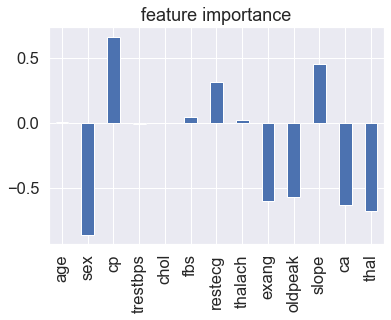

In [57]:
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="feature importance",legend=False)

In [58]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [59]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# 6. experimentation
if you haven't hit your evaluation metric yet -
* could you collect more data
* could you try a better model ? like CatBoost or XGBoost
* could you improve the current model 

if your model is good enough (you have hit your evaluation metric)
* how would you export it and share it with others